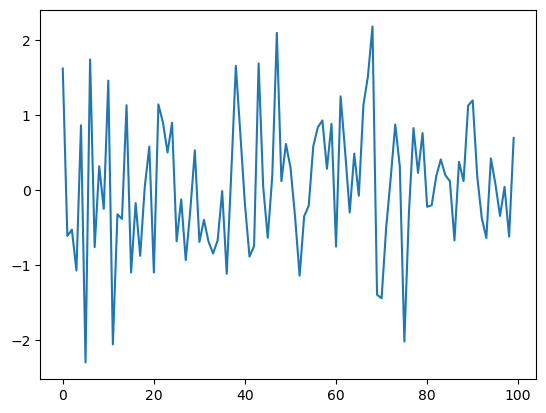

In [1]:
%matplotlib inline
import pylab as pl
pl.seed(1)
data = pl.randn(100)
pl.plot(data)

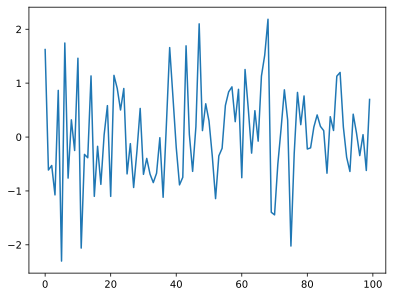

In [2]:
%config InlineBackend.figure_format="svg"
pl.plot(data)
#其中InlineBackend对象为matplotlib输出内嵌图表时所使用的配置，我们配置它的figure_format="svg"，这样可将内嵌图表的输出格式修改为SVG。

In [4]:
import numpy as np
n = 100000
np.sum(4.0 / np.r_[1:n:4, -3:-n:-4])

3.141572653589794

In [5]:
from scipy.integrate import quad
quad(lambda x:(1-x**2)**0.5, -1, 1)[0] * 2

3.141592653589797

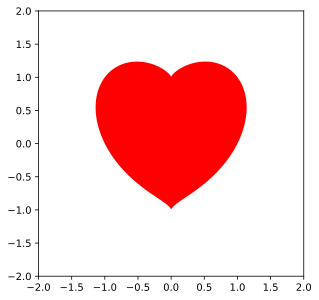

In [6]:
x, y = np.mgrid[-2:2:500j, -2:2:500j]
z = (x**2 + y**2 - 1)**3 - x**2 * y**3
pl.contourf(x, y, z, levels=[-1, 0], colors=["red"])
pl.gca().set_aspect("equal")

In [19]:
import numpy as np
numpy.__version__

'1.24.3'

In [20]:
a = np.array([1, 2, 3, 4])
b = np.array((5, 6, 7, 8))
c = np.array([[1, 2, 3, 4], [4, 5, 6, 7], [7, 8, 9, 10]])

In [21]:
a.shape,b.shape,c.shape

((4,), (4,), (3, 4))

In [22]:
c.shape=(4,3)
c

array([[ 1,  2,  3],
       [ 4,  4,  5],
       [ 6,  7,  7],
       [ 8,  9, 10]])

In [23]:
#当设置某个轴的元素个数为-1时，将自动计算此轴的长度。
c.shape=(2,-1)
c

array([[ 1,  2,  3,  4,  4,  5],
       [ 6,  7,  7,  8,  9, 10]])

In [24]:
d=a.reshape(2,2)
d

array([[1, 2],
       [3, 4]])

In [25]:
d=a.reshape((2,2))
d

array([[1, 2],
       [3, 4]])

In [26]:
#数组a和d其实共享数据存储空间，因此修改其中任意一个数组的元素都会同时修改另一个数组的内容。
a[1]=100
a,d

(array([  1, 100,   3,   4]),
 array([[  1, 100],
        [  3,   4]]))

In [28]:
#数组的元素类型可以通过dtype属性获得。
#如果使用64位的操作系统和Python，那么默认整数类型的长度为64位。
c.dtype

dtype('int32')

In [30]:
#可以通过dtype参数在创建数组时指定元素类型，注意float类型是64位的双精度浮点类型，而complex是128位的双精度复数类型：
a1=np.array([1,2,3,4],dtype=float)
a2=np.array([1,2,3,4],dtype=np.int32)
a1,a2

(array([1., 2., 3., 4.]), array([1, 2, 3, 4]))

在需要指定dtype参数时，也可以传递一个字符串来表示元素的数值类型。NumPy中的每个数值类型都有几种字符串表示方式，字符串和类型之间的对应关系都存储在typeDict字典中。下面的程序获得与float64类型对应的所有键值：

In [32]:
#数值类型与数组的dtype属性是不同的对象。通过dtype对象的type属性可以获得与其对应的数值类型：
c.dtype.type

numpy.int32

In [33]:
a=np.int16(200)
a*a
#通过NumPy的数值类型也可以创建数值对象
#下面创建一个16位的符号整数对象，它与Python的整数对象不同的是，它的取值范围有限，因此计算200*200会溢出，得到一个负数

C:\Users\lenovo\AppData\Local\Temp\ipykernel_9712\890261197.py:2: RuntimeWarning: overflow encountered in scalar multiply
  a*a


-25536

In [34]:
v1 = 3.14
v2 = np.float64(v1)
%timeit v1*v1
%timeit v2*v2
#NumPy的数值对象的运算速度比Python的内置类型的运算速度慢很多，如果程序中需要大量地对单个数值运算，应当尽量避免使用NumPy的数值对象

28.5 ns ± 1.06 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)
78.5 ns ± 0.351 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)


In [37]:
#例如下面的程序创建开始值为0、终值为1、步长为0.1的等差数组，注意终值1不在数组中：
np.arange(0,1,0.1)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

In [38]:
np.linspace(0,1,10,endpoint=False)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

In [39]:
np.linspace(0,1,10)
#linspace()通过指定开始值、终值和元素个数来创建表示等差数列的一维数组，可以通过endpoint参数指定是否包含终值，默认值为True，即包含终值。

array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ])

In [40]:
np.logspace(0,2,5)
#logspace()和linspace()类似，不过它所创建的数组是等比数列。下面的例子产生从10^0到10^2、有5个元素的等比数列

array([  1.        ,   3.16227766,  10.        ,  31.6227766 ,
       100.        ])

In [41]:
np.logspace(0,1,12,base=2,endpoint=False)
#基数可以通过base参数指定，其默认值为10

array([1.        , 1.05946309, 1.12246205, 1.18920712, 1.25992105,
       1.33483985, 1.41421356, 1.49830708, 1.58740105, 1.68179283,
       1.78179744, 1.88774863])

In [45]:
np.full(4,np.pi)

array([3.14159265, 3.14159265, 3.14159265, 3.14159265])

In [46]:
s = "abcdefgh"
np.fromstring(s,np.int8)
#Python的字符串实际上是一个字节序列，每个字符占一个字节.
#因此如果从字符串s创建一个8位的整数数组，所得到的数组正好就是字符串中每个字符的ASCII编码：

C:\Users\lenovo\AppData\Local\Temp\ipykernel_9712\2812049760.py:2: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  np.fromstring(s,np.int8)


array([ 97,  98,  99, 100, 101, 102, 103, 104], dtype=int8)

In [48]:
def func(i):
    return i % 4 + 1

np.fromfunction(func, (10,))
#fromfunction()的第一个参数是计算每个数组元素的函数，第二个参数指定数组的形状。因为它支持多维数组，所以第二个参数必须是一个序列。

array([1., 2., 3., 4., 1., 2., 3., 4., 1., 2.])

In [50]:
def func2(i,j):
    return (i+1)*(j+1)
np.fromfunction(func2,(9,9))
#每个元素a[i, j]都等于func2(i, j)

array([[ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9.],
       [ 2.,  4.,  6.,  8., 10., 12., 14., 16., 18.],
       [ 3.,  6.,  9., 12., 15., 18., 21., 24., 27.],
       [ 4.,  8., 12., 16., 20., 24., 28., 32., 36.],
       [ 5., 10., 15., 20., 25., 30., 35., 40., 45.],
       [ 6., 12., 18., 24., 30., 36., 42., 48., 54.],
       [ 7., 14., 21., 28., 35., 42., 49., 56., 63.],
       [ 8., 16., 24., 32., 40., 48., 56., 64., 72.],
       [ 9., 18., 27., 36., 45., 54., 63., 72., 81.]])

In [52]:
a=np.arange(10)
a[2:4]=100,101
a

array([  0,   1, 100, 101,   4,   5,   6,   7,   8,   9])

In [53]:
#和列表不同的是，通过切片获取的新的数组是原始数组的一个视图。它与原始数组共享同一块数据存储空间。
b=a[3:7]
b[2]=-10
a,b

(array([  0,   1, 100, 101,   4, -10,   6,   7,   8,   9]),
 array([101,   4, -10,   6]))

In [54]:
x=np.arange(10,1,-1)
a=x[[3,3,1,8]]#获取x中的下标为3、3、1、8的4个元素，组成一个新的数组。
b=x[[3,3,-3,8]]
a,b

(array([7, 7, 9, 2]), array([7, 7, 4, 2]))

In [55]:
b[2]=100
b,x#不共享内存

(array([  7,   7, 100,   2]), array([10,  9,  8,  7,  6,  5,  4,  3,  2]))

In [56]:
x[[3,5,1]]=-1,-2,-3
x

array([10, -3,  8, -1,  6, -2,  4,  3,  2])

In [58]:
x=np.arange(10,1,-1)
x[np.array([3,3,1,8])]

array([7, 7, 9, 2])

In [62]:
x[np.array([[3,3,1,8],[3,3,-3,8]])]

array([[7, 7, 9, 2],
       [7, 7, 4, 2]])

In [63]:
x[[3,3,1,8,3,3,-3,8]].reshape(2,4)

array([[7, 7, 9, 2],
       [7, 7, 4, 2]])

In [68]:
x=np.random.randint(0,10,6)#长度为6，元素值为0~9的随机整数
x,x>5

(array([6, 7, 3, 7, 6, 7]), array([ True,  True, False,  True,  True,  True]))

In [69]:
x[x>5]

array([6, 7, 7, 6, 7])

In [70]:
#由纵向量(0, 10, 20, 30, 40, 50)和横向量(0,1, 2, 3, 4, 5)的元素相加而得。
a=np.arange(0,60,10).reshape(-1,1)+np.arange(0,6)
a

array([[ 0,  1,  2,  3,  4,  5],
       [10, 11, 12, 13, 14, 15],
       [20, 21, 22, 23, 24, 25],
       [30, 31, 32, 33, 34, 35],
       [40, 41, 42, 43, 44, 45],
       [50, 51, 52, 53, 54, 55]])

In [73]:
b=a[0,3:5]
b[0]=-b[0]
b

array([-3,  4])

In [75]:
idx=slice(None,None,2),slice(2,None)
idx
#根据Python的语法，在[]中可以使用以冒号隔开的两个或三个整数表示切片，但是单独生成切片对象时需要使用slice()来创建。
#它有三个参数，分别为开始值、结束值和间隔步长，当这些值需要省略时可以使用None。
#例如，a[slice(None,None,None),2]和a[:, 2]相同。

(slice(None, None, 2), slice(2, None, None))

In [76]:
np.s_[::2,2:]

(slice(None, None, 2), slice(2, None, None))

In [77]:
a[(0,1,2,3),(1,2,3,4)]#对角线上元素

array([ 1, 12, 23, 34])

In [79]:
a[3:,[0,2,5]]

array([[30, 32, 35],
       [40, 42, 45],
       [50, 52, 55]])

In [81]:
mask=np.array([1,0,1,0,0,1])
a[mask,2]#mask是矩阵行的索引

array([12,  2, 12,  2,  2, 12])

In [82]:
a[[1,2],:]

array([[10, 11, 12, 13, 14, 15],
       [20, 21, 22, 23, 24, 25]])

In [85]:
a[[1,2]]

array([[10, 11, 12, 13, 14, 15],
       [20, 21, 22, 23, 24, 25]])

In [86]:
x=np.array([[0,1],[2,3]])
y=np.array([[-1,-2],[-3,-4]])#[0,1]行[-1,-2]列和[2,3]行[-3,-4]列
a[x,y]

array([[ 5, 14],
       [23, 32]])

In [87]:
a[(0,1,2,3),(-1,-2,-3,-4)].reshape(2,2)

array([[ 5, 14],
       [23, 32]])

In [88]:
a[x]

array([[[ 0,  1,  2, -3,  4,  5],
        [10, 11, 12, 13, 14, 15]],

       [[20, 21, 22, 23, 24, 25],
        [30, 31, 32, 33, 34, 35]]])

In [89]:
palette = np.array( [ [0,0,0],                
                      [255,0,0],              
                      [0,255,0],              
                      [0,0,255],              
                      [255,255,255] ] )       
image = np.array( [ [ 0, 1, 2, 0 ],           
                    [ 0, 3, 4, 0 ]  ] )
palette[image]

array([[[  0,   0,   0],
        [255,   0,   0],
        [  0, 255,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0, 255],
        [255, 255, 255],
        [  0,   0,   0]]])

In [90]:
persontype = np.dtype({
    'names':['name', 'age', 'weight'],
    'formats':['S30','i', 'f']}, align=True)
a = np.array([("Zhang", 32, 75.5), ("Wang", 24, 65.2)],
    dtype=persontype)

In [91]:
a.dtype

dtype([('name', 'S30'), ('age', '<i4'), ('weight', '<f4')], align=True)

In [92]:
a[0]

(b'Zhang', 32, 75.5)

In [93]:
a[0].dtype

dtype([('name', 'S30'), ('age', '<i4'), ('weight', '<f4')], align=True)

In [94]:
a[0]['name']

b'Zhang'

In [96]:
c=a[1]
c['name']='li'
a[1]['name']

b'li'

In [97]:
b=a['age']
b[0]=40
a[0]['age']

40

In [98]:
#可以将数组a以二进制的方式转换成字符串或写入文件：
a.tofile('test.bin')

In [99]:
#%%file为IPython的魔法命令，它将该单元格中的文本保存成文件read_struct_array.c
%%file read_struct_array.c
#include <stdio.h>
#把下面的命令写入read_struct_array.c
struct person 
{
    char name[30];
    int age;
    float weight;
};

struct person p[3];

void main ()
{
    FILE *fp;
    int i;
    fp=fopen("test.bin","rb");
    fread(p, sizeof(struct person), 2, fp);
    fclose(fp);
    for(i=0;i<2;i++)
    {
        printf("%s %d %f\n", p[i].name, p[i].age, p[i].weight);
    }
}

Writing read_struct_array.c


In [101]:
numpy.array(object, dtype = None, copy = True, order = None, subok = False, ndmin = 0)

array(<class 'object'>, dtype=object)

In [102]:
 import numpy as np
 a = np.array([1,2,3])
 print(a)
 print('*'*10)
 # 多于一个维度
 b = np.array([[1,  2],  [3,  4]])
 print(b)
 print('*'*10)
 # 最小维度ndmin
 c = np.array([1, 2, 3, 4, 5], ndmin =  2)
 print(c)
 print('*'*10)
 # dtype参数
 d = np.array([1,  2,  3], dtype = complex)
 print(d)

[1 2 3]
**********
[[1 2]
 [3 4]]
**********
[[1 2 3 4 5]]
**********
[1.+0.j 2.+0.j 3.+0.j]


In [103]:
 import numpy as np
 # 使用标量类型
 dt = np.dtype(np.int32)
 print(dt)
 print('*'*10)
 # int8, int16, int32, int64 4种数据类型可以使用字符串 'i1', 'i2','i4','i8' 代替
 s2 = np.dtype('i4')
 print(s2)
 print('*'*10)
 # 字节顺序标注
 s3 = np.dtype('<i4')
 print(s3)
 print('*'*10)
 # 首先创建结构化数据类型
 s4 = np.dtype([('age',np.int8)])
 print(s4)
 print('*'*10)
 # 将数据类型应用于ndarray对象
 w = np.dtype([('age',np.int8)])
 s5 = np.array([(10,),(20,),(30,)], dtype = w)
 print(s5)
 print('*'*10)
 # 类型字段名可以用于存取实际的 age 列
 y = np.dtype([('age',np.int8)])
 s6 = np.array([(10,),(20,),(30,)], dtype = y)
 print(s6['age'])
 print('*'*10)
 student = np.dtype([('name','S20'), ('age', 'i1'), ('marks', 'f4')])
 print(student)
 print('*'*10)
 student = np.dtype([('name','S20'), ('age', 'i1'), ('marks', 'f4')])
 s8 = np.array([('abc', 21, 50),('xyz', 18, 75)], dtype = student)
 print(s8)

int32
**********
int32
**********
int32
**********
[('age', 'i1')]
**********
[(10,) (20,) (30,)]
**********
[10 20 30]
**********
[('name', 'S20'), ('age', 'i1'), ('marks', '<f4')]
**********
[(b'abc', 21, 50.) (b'xyz', 18, 75.)]


In [104]:
 import numpy as np
 a = np.arange(24)
 print(a.ndim)  # a 现只有一个维度
 # 现在调整其大小
 b = a.reshape(2, 4, 3)  # b 现在拥有三个维度
 print(b.ndim)

1
3


In [105]:
 import numpy as np
 a = np.array([[1, 2, 3], [4, 5, 6]])
 print(a.shape)
 print('*'*10)
 # 调整数组大小
 a.shape = (3,2)
 print(a)
 print('*'*10)
 # 使用reshape函数来调整数组大小
 a = np.array([[1,2,3],[4,5,6]])
 b = a.reshape(3,2)
 print(b)

(2, 3)
**********
[[1 2]
 [3 4]
 [5 6]]
**********
[[1 2]
 [3 4]
 [5 6]]


In [106]:
 import numpy as np
 # 数组的 dtype 为 int8（一字节）
 x = np.array([1, 2, 3, 4, 5], dtype=np.int8)
 print(x.itemsize)
 # 数组的 dtype 现在为 float64（8字节）
 y = np.array([1, 2, 3, 4, 5], dtype=np.float64)
 print(y.itemsize)

1
8


In [107]:
 import numpy as np
 x = np.array([1, 2, 3, 4, 5])
 print(x.flags)
#ndarray.flags返回ndarray对象的内存信息

  C_CONTIGUOUS : True
  F_CONTIGUOUS : True
  OWNDATA : True
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False



In [109]:
#numpy.empty()函数用来创建一个指定形状(shape)、数据类型(dtype)且未初始化的数组
#     numpy.empty(shape, dtype = float, order = 'C')
#order：有C和F两个选项，分别代表行优先和列优先，是计算机内存中存储元素的顺序。
import numpy as np
s = np.empty([4, 6], dtype = int)
print(s)

[[ 0  1  2  3  4  5]
 [ 6  7  8  9 10 11]
 [12 13 14 15 16 17]
 [18 19 20 21 22 23]]


In [111]:
import numpy as np
# 默认为浮点数
x = np.zeros(5)
print(x)
# 设置类型为整数
y = np.zeros((5,), dtype=np.int_)
print(y)
# 自定义类型
z = np.zeros((2, 2), dtype=[('x', 'i4'), ('y', 'i4')])
print(z)

[0. 0. 0. 0. 0.]
[0 0 0 0 0]
[[(0, 0) (0, 0)]
 [(0, 0) (0, 0)]]


In [112]:
 import numpy as np
 # 默认为浮点数
 x = np.ones(5)
 print(x)
 print('*'*10)
 # 自定义类型
 x = np.ones([3, 3], dtype=int)
 print(x)

[1. 1. 1. 1. 1.]
**********
[[1 1 1]
 [1 1 1]
 [1 1 1]]


In [114]:
import numpy as np
x = (100, 2000, 300000)
a = np.asarray(x)
print(a)

[   100   2000 300000]


In [113]:
import numpy as np
x = [4, 5, 6, 10000]
a = np.asarray(x)
print(a)

[    4     5     6 10000]


In [115]:
import numpy as np
x = [(1, 2, 3), (4, 5)]
a = np.asarray(x)
print(a)
print('*'*10)
# 设置了dtype参数
y =  [1,2,3]
b = np.asarray(y, dtype =  float)
print(b)

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (2,) + inhomogeneous part.

In [116]:
#numpy.frombuffer()函数用于实现动态数组，该函数接受buffer输入参数，并以流的形式读入转换成ndarray对象。
#当buffer是字符串的时候，Python 3默认str是Unicode类型，所以要在原str前加上b转成bytestring。
import numpy as np
s = b'Hello World'
a = np.frombuffer(s, dtype='S1')
print(a)

[b'H' b'e' b'l' b'l' b'o' b' ' b'W' b'o' b'r' b'l' b'd']


In [117]:
import numpy as np
# 使用range函数创建列表对象
list = range(10)
it = iter(list)
# 使用迭代器创建 ndarray
x = np.fromiter(it, dtype=float)
print(x)
#numpy.fromiter()函数从可迭代对象中建立ndarray对象

[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]


In [118]:
import numpy as np
# 生成0～9的数组
x = np.arange(10)
print(x)
print('*'*10)
# 设置返回类型为float
x = np.arange(10, dtype = float)
print(x)
print('*'*10)
# 设置了起始值、终止值及步长
x = np.arange(10, 20, 2)
print(x)

[0 1 2 3 4 5 6 7 8 9]
**********
[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]
**********
[10 12 14 16 18]


In [119]:
import numpy as np
a = np.linspace(1,10,10)
print(a)
# 设置元素全部是1的等差数列
print('*'*10)
a = np.linspace(1,1,10)
print(a)
print('*'*10)
# 将endpoint设为false，不包含终止值
a = np.linspace(10, 20,  5, endpoint = False)
print(a)
print('*'*10)
# 如果将endpoint设为true，则会包含20
a = np.linspace(10, 20,  5, endpoint = True)
print(a)
print('*'*10)

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
**********
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
**********
[10. 12. 14. 16. 18.]
**********
[10.  12.5 15.  17.5 20. ]
**********


In [120]:
import numpy as np
# 默认底数是10
a = np.logspace(1.0,  2.0, num = 10)
print(a)
print('*'*10)
# 将对数的底数设置为2
a = np.logspace(0, 9, 10, base=2)
print (a)

[ 10.          12.91549665  16.68100537  21.5443469   27.82559402
  35.93813664  46.41588834  59.94842503  77.42636827 100.        ]
**********
[  1.   2.   4.   8.  16.  32.  64. 128. 256. 512.]


In [121]:
import numpy as np
a = np.arange(20)
s = slice(3, 8, 2)  # 从索引3开始到索引8停止，间隔为2
print(a[s])

[3 5 7]


In [122]:
import numpy as np
t = np.array([[4, 6, 8], [9, 7, 0], [11, 22, 44]])
print(t[..., 1])  # 第2列元素
print(t[1, ...])  # 第2行元素
print(t[..., 1:])  # 第2列及剩下的所有元素

[ 6  7 22]
[9 7 0]
[[ 6  8]
 [ 7  0]
 [22 44]]


In [123]:
import numpy as np
x = np.array([[4, 6, 8], [9, 7, 0], [11, 22, 44]])
y = x[[0, 1, 2], [0, 1, 0]]#0，0；1，1；2，0元素
print(y)

[ 4  7 11]


In [124]:
import numpy as np
a = np.array([[4, 6, 8], [9, 7, 0], [11, 22, 44]])
b = a[1:3, 1:3]
c = a[1:3, [1, 2]]
d = a[..., 1:]
print(b)
print('*'*10)
print(c)
print('*'*10)
print(d)

[[ 7  0]
 [22 44]]
**********
[[ 7  0]
 [22 44]]
**********
[[ 6  8]
 [ 7  0]
 [22 44]]


In [125]:
import numpy as np
x = np.array([[400, 1, 2], [300, 4, 500], [6, 799, 8], [9654, 100, 11]])
print('数组是：')
print(x)
print('*'*10)
print('\n')
# 现在会打印出大于100的元素
print('大于100的元素是：')
print(x[x > 100])

数组是：
[[ 400    1    2]
 [ 300    4  500]
 [   6  799    8]
 [9654  100   11]]
**********


大于100的元素是：
[ 400  300  500  799 9654]


In [126]:
import numpy as np
a = np.array([np.nan, 100, 321, np.nan, 999, 666])
print(a[~np.isnan(a)])#过滤掉nan

[100. 321. 999. 666.]


In [127]:
import numpy as np
a = np.array([1, 2 + 6j, 5, 3.5 + 5j])
print(a[np.iscomplex(a)])

[2. +6.j 3.5+5.j]


In [128]:
import numpy as np
x = np.arange(32).reshape((8, 4))
print(x)
print(x[[4, 2, 1, 7]])

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]
 [16 17 18 19]
 [20 21 22 23]
 [24 25 26 27]
 [28 29 30 31]]
[[16 17 18 19]
 [ 8  9 10 11]
 [ 4  5  6  7]
 [28 29 30 31]]


In [129]:
 import numpy as np
 x = np.arange(32).reshape((8, 4))
 print(x[[-4, -2, -1, -7]])

[[16 17 18 19]
 [24 25 26 27]
 [28 29 30 31]
 [ 4  5  6  7]]


In [130]:
import numpy as np
x = np.arange(32).reshape((8, 4))
print(x[np.ix_([1, 5, 7, 2], [0, 3, 1, 2])])
#传入多个索引数组（要使用np.ix_）

[[ 4  7  5  6]
 [20 23 21 22]
 [28 31 29 30]
 [ 8 11  9 10]]


In [132]:
a=np.arange(6).reshape(2,3)
for x in np.nditer(a):
    print(x,end=',')
#numpy.nditer提供了一种灵活访问一个或多个数组元素的方式。迭代器最基本的任务是可以完成对数组元素的访问。
#使用nditer对其进行迭代

0,1,2,3,4,5,

In [134]:
a=np.arange(6).reshape(2,3)
for x in np.nditer(a.T):
    print(x,end=',')
print('\n')
for x in np.nditer(a.T.copy(order='C')):                  #以C行顺序访问
    print(x,end=',')

0,1,2,3,4,5,

0,3,1,4,2,5,

In [137]:
#(1)for x in np.nditer(a, order='F'):Fortran order：列序优先。(2)for x in np.nditer(a.T, order='C'):C order：行序优先。
a=np.arange(0,80,4)
a=a.reshape(4,5)
b=a.T
c=b.copy(order='C')
print(b,'\n',c)
for x in np.nditer(c):
    print(x,end=',')
print('\n')
c=b.copy(order='F')
print(b,'\n',c)
for x in np.nditer(c):
    print(x,end=',')
print('\n')

[[ 0 20 40 60]
 [ 4 24 44 64]
 [ 8 28 48 68]
 [12 32 52 72]
 [16 36 56 76]] 
 [[ 0 20 40 60]
 [ 4 24 44 64]
 [ 8 28 48 68]
 [12 32 52 72]
 [16 36 56 76]]
0,20,40,60,4,24,44,64,8,28,48,68,12,32,52,72,16,36,56,76,

[[ 0 20 40 60]
 [ 4 24 44 64]
 [ 8 28 48 68]
 [12 32 52 72]
 [16 36 56 76]] 
 [[ 0 20 40 60]
 [ 4 24 44 64]
 [ 8 28 48 68]
 [12 32 52 72]
 [16 36 56 76]]
0,4,8,12,16,20,24,28,32,36,40,44,48,52,56,60,64,68,72,76,



In [139]:
for x in np.nditer(a,order='C'):
    print(x,end=',')
print('\n')
for x in np.nditer(a,order='F'):
    print(x,end=',')
print('\n')

0,4,8,12,16,20,24,28,32,36,40,44,48,52,56,60,64,68,72,76,

0,20,40,60,4,24,44,64,8,28,48,68,12,32,52,72,16,36,56,76,



In [140]:
import numpy as np
a = np.arange(0, 80, 4)
a = a.reshape(4, 5)
print('原始数组是：')
print(a)
print('\n')
for x in np.nditer(a, op_flags=['readwrite']):
 x[...] = 2 * x
print('修改后的数组是：')
print(a)
#nditer对象有另一个可选参数op_flags。默认情况下，nditer将视待迭代遍历的数组为只读对象(read-only)
#为了在遍历数组的同时实现对数组元素值的修改，必须指定op_flags参数为read-write或者write-only模式。

原始数组是：
[[ 0  4  8 12 16]
 [20 24 28 32 36]
 [40 44 48 52 56]
 [60 64 68 72 76]]


修改后的数组是：
[[  0   8  16  24  32]
 [ 40  48  56  64  72]
 [ 80  88  96 104 112]
 [120 128 136 144 152]]


In [141]:
import numpy as np
a = np.arange(0, 80, 4)
a = a.reshape(4, 5)
print('原始数组是：')
print(a)
print('\n')
print('修改后的数组是：')
for x in np.nditer(a, flags = ['external_loop'], order = 'F'):
    print(x, end=", ")
#迭代器对应每列遍历数组，并组合为一维数组。

原始数组是：
[[ 0  4  8 12 16]
 [20 24 28 32 36]
 [40 44 48 52 56]
 [60 64 68 72 76]]


修改后的数组是：
[ 0 20 40 60], [ 4 24 44 64], [ 8 28 48 68], [12 32 52 72], [16 36 56 76], 

In [142]:
 import numpy as np
 a = np.arange(9).reshape(3, 3)
 print('原始数组：')
 for row in a:
     print(row)
 # 对数组中每个元素都进行处理，可以使用flat属性，该属性是一个数组元素迭代器
 print('迭代后的数组：')
 for element in a.flat:
     print(element)

原始数组：
[0 1 2]
[3 4 5]
[6 7 8]
迭代后的数组：
0
1
2
3
4
5
6
7
8


In [143]:
 import numpy as np
 a = np.arange(0, 16, 2).reshape(4, 2)
 print('原始数组：')
 print(a)
 print('\n')
 print('调用ravel函数之后：')
 print(a.ravel())
 print('\n')
 print('以F风格顺序调用ravel函数之后：')
 print(a.ravel(order='F'))
#order：'C'为按行，'F'为按列，'A'为原顺序，'K'为元素在内存中出现的顺序。

原始数组：
[[ 0  2]
 [ 4  6]
 [ 8 10]
 [12 14]]


调用ravel函数之后：
[ 0  2  4  6  8 10 12 14]


以F风格顺序调用ravel函数之后：
[ 0  4  8 12  2  6 10 14]


In [144]:
 import numpy as np
 a = np.arange(0, 24, 2).reshape(3, 4)
 print('原始数组：')
 print(a)
 print('\n')
 print('对换数组：')
 print(np.transpose(a))

原始数组：
[[ 0  2  4  6]
 [ 8 10 12 14]
 [16 18 20 22]]


对换数组：
[[ 0  8 16]
 [ 2 10 18]
 [ 4 12 20]
 [ 6 14 22]]


In [145]:
 import numpy as np
 # 创建了三维的 ndarray
 a = np.arange(0, 48, 2).reshape(2, 3, 4)
 print('原始数组：')
 print(a)
 print('获取数组中一个值：')
 print(np.where(a == 6))
 print(a[1, 1, 0])  # 为 6
 print('\n')
 # 将轴 2 滚动到轴 0（宽度到深度）
 print('调用 rollaxis 函数：')
 b = np.rollaxis(a, 2, 0)
 print(b)
 # 查看元素 a[1,1,0]，即 6 的坐标，变成 [0, 1, 1]
 # 最后一个 0 移动到最前面
 print(np.where(b == 6))
 print('\n')
 # 将轴 2 滚动到轴 1（宽度到高度）
 print('调用 rollaxis 函数：')
 c = np.rollaxis(a, 2, 1)
 print(c)
 # 查看元素 a[1,1,0]，即 6 的坐标，变成 [1, 0, 1]
 # 最后的 0 和 它前面的 1 对换位置
 print(np.where(c == 6))
 print('\n')
#     numpy.rollaxis(arr, axis, start)
#axis：要向后滚动的轴，其他轴的相对位置不会改变。

原始数组：
[[[ 0  2  4  6]
  [ 8 10 12 14]
  [16 18 20 22]]

 [[24 26 28 30]
  [32 34 36 38]
  [40 42 44 46]]]
获取数组中一个值：
(array([0], dtype=int64), array([0], dtype=int64), array([3], dtype=int64))
32


调用 rollaxis 函数：
[[[ 0  8 16]
  [24 32 40]]

 [[ 2 10 18]
  [26 34 42]]

 [[ 4 12 20]
  [28 36 44]]

 [[ 6 14 22]
  [30 38 46]]]
(array([3], dtype=int64), array([0], dtype=int64), array([0], dtype=int64))


调用 rollaxis 函数：
[[[ 0  8 16]
  [ 2 10 18]
  [ 4 12 20]
  [ 6 14 22]]

 [[24 32 40]
  [26 34 42]
  [28 36 44]
  [30 38 46]]]
(array([0], dtype=int64), array([3], dtype=int64), array([0], dtype=int64))




In [146]:
import numpy as np
# 创建了三维的 ndarray
a = np.arange(0, 48, 2).reshape(2, 3, 4)
print('原始数组：')
print(a)
print('\n')
# 现在交换轴 0（深度方向）到轴 2（宽度方向）
print('调用 swapaxes 函数后的数组：')
print(np.swapaxes(a, 2, 0))

原始数组：
[[[ 0  2  4  6]
  [ 8 10 12 14]
  [16 18 20 22]]

 [[24 26 28 30]
  [32 34 36 38]
  [40 42 44 46]]]


调用 swapaxes 函数后的数组：
[[[ 0 24]
  [ 8 32]
  [16 40]]

 [[ 2 26]
  [10 34]
  [18 42]]

 [[ 4 28]
  [12 36]
  [20 44]]

 [[ 6 30]
  [14 38]
  [22 46]]]


In [149]:
 import numpy as np
 x = np.array([[1], [2], [3]])
 y = np.array([4, 5, 6])
 # 对 y 广播 x
 b = np.broadcast(x, y)
#print(b)
 # 它拥有 iterator 属性，基于自身组件的迭代器元组
 print('对 y 广播 x：')
# r, c = b.iters
print(r,c)
 # Python3.x 为 next(context) ，Python2.x 为 context.next()
 print(next(r), next(c))
 print(next(r), next(c))
 print('\n')
 # shape 属性返回广播对象的形状
 print('广播对象的形状：')
 print(b.shape)
 print('\n')
 # 手动使用 broadcast 将 x 与 y 相加
 b = np.broadcast(x, y)
 c = np.empty(b.shape)
 print('手动使用 broadcast 将 x 与 y 相加：')
 print(c.shape)
 print('\n')
 c.flat = [u + v for (u, v) in b]
 print('调用 flat 函数：')
 print(c)
 print('\n')
 # 获得了和 NumPy 内建的广播支持相同的结果
 print('x 与 y 的和：')
 print(x + y)

对 y 广播 x：
<numpy.flatiter object at 0x000002902237FA80> <numpy.flatiter object at 0x0000029020085600>
1 4
1 5


广播对象的形状：
(3, 3)


手动使用 broadcast 将 x 与 y 相加：
(3, 3)


调用 flat 函数：
[[5. 6. 7.]
 [6. 7. 8.]
 [7. 8. 9.]]


x 与 y 的和：
[[5 6 7]
 [6 7 8]
 [7 8 9]]


In [150]:
 import numpy as np
 a = np.arange(0, 12, 2).reshape(1, 6)
 print('原始数组：')
 print(a)
 print('\n')
 print('调用 broadcast_to 函数之后：')
 print(np.broadcast_to(a, (4, 6)))

原始数组：
[[ 0  2  4  6  8 10]]


调用 broadcast_to 函数之后：
[[ 0  2  4  6  8 10]
 [ 0  2  4  6  8 10]
 [ 0  2  4  6  8 10]
 [ 0  2  4  6  8 10]]


In [151]:
 import numpy as np
 x = np.array(([1, 2], [3, 4]))
 print('数组x：')
 print(x)
 print('\n')
 y = np.expand_dims(x, axis=0)
 print('数组y：')
 print(y)
 print('\n')
 print('数组x和y的形状：')
 print(x.shape, y.shape)
 print('\n')
 # 在位置 1 插入轴 numpy.expand_dims()函数通过在指定位置插入新的轴来扩展数组形状
 y = np.expand_dims(x, axis=1)
 print('在位置1插入轴之后的数组y：')
 print(y)
 print('\n')
 print('x.ndim 和 y.ndim：')
 print(x.ndim, y.ndim)
 print('\n')
 print('x.shape和y.shape：')
 print(x.shape, y.shape)

数组x：
[[1 2]
 [3 4]]


数组y：
[[[1 2]
  [3 4]]]


数组x和y的形状：
(2, 2) (1, 2, 2)


在位置1插入轴之后的数组y：
[[[1 2]]

 [[3 4]]]


x.ndim 和 y.ndim：
2 3


x.shape和y.shape：
(2, 2) (2, 1, 2)


In [152]:
 import numpy as np
 x = np.arange(9).reshape(1, 3, 3)
 print('数组x：')
 print(x)
 print('\n')
 y = np.squeeze(x)
 print('数组y：')
 print(y)
 print('\n')
 print('数组x和y的形状：')
 print(x.shape, y.shape)
#numpy.squeeze()函数从给定数组的形状中删除一维的条目

数组x：
[[[0 1 2]
  [3 4 5]
  [6 7 8]]]


数组y：
[[0 1 2]
 [3 4 5]
 [6 7 8]]


数组x和y的形状：
(1, 3, 3) (3, 3)


In [153]:
 import numpy as np
 a = np.array([[88, 99], [66, 33]])
 print('第一个数组：')
 print(a)
 print('\n')
 b = np.array([[55, 44], [77, 22]])
 print('第二个数组：')
 print(b)
 print('\n')
 # 两个数组的维度相同
 print('沿轴 0 连接两个数组：')
 print(np.concatenate((a, b)))
 print('\n')
 print('沿轴 1 连接两个数组：')
 print(np.concatenate((a, b), axis=1))

第一个数组：
[[88 99]
 [66 33]]


第二个数组：
[[55 44]
 [77 22]]


沿轴 0 连接两个数组：
[[88 99]
 [66 33]
 [55 44]
 [77 22]]


沿轴 1 连接两个数组：
[[88 99 55 44]
 [66 33 77 22]]


In [154]:
 import numpy as np
 a = np.array([[1, 2], [3, 4]])
 print('第一个数组：')
 print(a)
 print('\n')
 b = np.array([[5, 6], [7, 8]])
 print('第二个数组：')
 print(b)
 print('\n')
 print('沿轴 0 堆叠两个数组：')
 print(np.stack((a, b), 0))
 print('\n')
 print('沿轴 1 堆叠两个数组：')
 print(np.stack((a, b), 1))

第一个数组：
[[1 2]
 [3 4]]


第二个数组：
[[5 6]
 [7 8]]


沿轴 0 堆叠两个数组：
[[[1 2]
  [3 4]]

 [[5 6]
  [7 8]]]


沿轴 1 堆叠两个数组：
[[[1 2]
  [5 6]]

 [[3 4]
  [7 8]]]


In [155]:
 import numpy as np
 a = np.array([[99, 88], [77, 66]])
 print('第一个数组：')
 print(a)
 print('\n')
 b = np.array([[11, 22], [33, 44]])
 print('第二个数组：')
 print(b)
 print('\n')
 print('水平堆叠：')
 c = np.hstack((a, b))
 print(c)
 print('\n')

第一个数组：
[[99 88]
 [77 66]]


第二个数组：
[[11 22]
 [33 44]]


水平堆叠：
[[99 88 11 22]
 [77 66 33 44]]




In [156]:
 import numpy as np
 a = np.array([[99, 88], [77, 66]])
 print('第一个数组：')
 print(a)
 print('\n')
 b = np.array([[11, 22], [33, 44]])
 print('第二个数组：')
 print(b)
 print('\n')
 print('竖直堆叠：')
 c = np.vstack((a, b))
 print(c)

第一个数组：
[[99 88]
 [77 66]]


第二个数组：
[[11 22]
 [33 44]]


竖直堆叠：
[[99 88]
 [77 66]
 [11 22]
 [33 44]]


In [157]:
 import numpy as np
 a = np.arange(0, 27, 3)
 print('第一个数组：')
 print(a)
 print('*'*10)
 print('将数组分为三个大小相等的子数组：')
 b = np.split(a, 3)
 print(b)
 print('*'*20)
 print('将数组在一维数组中表明的位置分割：')
 b = np.split(a, [4, 7])
 print(b)

第一个数组：
[ 0  3  6  9 12 15 18 21 24]
**********
将数组分为三个大小相等的子数组：
[array([0, 3, 6]), array([ 9, 12, 15]), array([18, 21, 24])]
********************
将数组在一维数组中表明的位置分割：
[array([0, 3, 6, 9]), array([12, 15, 18]), array([21, 24])]


In [158]:
 import numpy as np
 a = np.arange(0, 64, 4).reshape(4, 4)
 print('第一个数组：')
 print(a)
 print('\n')
 print('默认分割（0轴）：')
 b = np.split(a,2)
 print(b)
 print('*'*20)
 print('沿垂直方向分割：')
 c = np.split(a,2,1)
 print(c)
 print('*'*20)
 print('沿水平方向分割：')
 d= np.hsplit(a,2)
 print(d)

第一个数组：
[[ 0  4  8 12]
 [16 20 24 28]
 [32 36 40 44]
 [48 52 56 60]]


默认分割（0轴）：
[array([[ 0,  4,  8, 12],
       [16, 20, 24, 28]]), array([[32, 36, 40, 44],
       [48, 52, 56, 60]])]
********************
沿垂直方向分割：
[array([[ 0,  4],
       [16, 20],
       [32, 36],
       [48, 52]]), array([[ 8, 12],
       [24, 28],
       [40, 44],
       [56, 60]])]
********************
沿水平方向分割：
[array([[ 0,  4],
       [16, 20],
       [32, 36],
       [48, 52]]), array([[ 8, 12],
       [24, 28],
       [40, 44],
       [56, 60]])]


In [159]:
 import numpy as np
 harr = np.floor(10 * np.random.random((2, 6)))
 print('原array：')
 print(harr)
 print('拆分后：')
 print(np.hsplit(harr, 3))

原array：
[[3. 0. 5. 6. 1. 1.]
 [7. 3. 9. 5. 7. 7.]]
拆分后：
[array([[3., 0.],
       [7., 3.]]), array([[5., 6.],
       [9., 5.]]), array([[1., 1.],
       [7., 7.]])]


In [160]:
 import numpy as np
 a = np.arange(0, 64, 4).reshape(4, 4)
 print('第一个数组：')
 print(a)
 print('*'*20)
 print('竖直分割：')
 b = np.vsplit(a, 2)
 print(b)

第一个数组：
[[ 0  4  8 12]
 [16 20 24 28]
 [32 36 40 44]
 [48 52 56 60]]
********************
竖直分割：
[array([[ 0,  4,  8, 12],
       [16, 20, 24, 28]]), array([[32, 36, 40, 44],
       [48, 52, 56, 60]])]


In [161]:
 import numpy as np
 a = np.array([[99, 88, 77], [66, 55, 44]])
 print('第一个数组：')
 print(a)
 print('*'*20)
 print('第一个数组的形状：')
 print(a.shape)
 print('*'*20)
 b = np.resize(a, (3, 2))
 print('第二个数组：')
 print(b)
 print('*'*20)
 print('第二个数组的形状：')
 print(b.shape)
 print('*'*20)
 print('修改第二个数组的大小：')
 b = np.resize(a, (3, 3))
 print(b)

第一个数组：
[[99 88 77]
 [66 55 44]]
********************
第一个数组的形状：
(2, 3)
********************
第二个数组：
[[99 88]
 [77 66]
 [55 44]]
********************
第二个数组的形状：
(3, 2)
********************
修改第二个数组的大小：
[[99 88 77]
 [66 55 44]
 [99 88 77]]


In [162]:
     import numpy as np
     a = np.array([[1, 2, 3], [4, 5, 6]])
     print('第一个数组：')
     print(a)
     print('*'*20)
     print('向数组添加元素：')
     print(np.append(a, [7, 8, 9]))
     print('*'*20)
     print('沿轴0添加元素：')
     print(np.append(a, [[7, 8, 9]], axis=0))
     print('*'*20)
     print('沿轴1添加元素：')
     print(np.append(a, [[5, 5, 5], [7, 8, 9]], axis=1))

第一个数组：
[[1 2 3]
 [4 5 6]]
********************
向数组添加元素：
[1 2 3 4 5 6 7 8 9]
********************
沿轴0添加元素：
[[1 2 3]
 [4 5 6]
 [7 8 9]]
********************
沿轴1添加元素：
[[1 2 3 5 5 5]
 [4 5 6 7 8 9]]


In [163]:
     import numpy as np
     a = np.array([[1, 2], [3, 4], [5, 6]])
     print('第一个数组：')
     print(a)
     print('*'*20)
     print('未传递Axis参数。在插入之前输入数组会被展开。')
     print(np.insert(a, 3, [11, 12]))
     print('*'*20)
     print('传递了Axis参数。让广播值数组来匹配输入数组。')
     print('沿轴0广播：')
     print(np.insert(a, 1, [11], axis=0))
     print('*'*20)
     print('沿轴1广播：')
     print(np.insert(a, 1, 11, axis=1))

第一个数组：
[[1 2]
 [3 4]
 [5 6]]
********************
未传递Axis参数。在插入之前输入数组会被展开。
[ 1  2  3 11 12  4  5  6]
********************
传递了Axis参数。让广播值数组来匹配输入数组。
沿轴0广播：
[[ 1  2]
 [11 11]
 [ 3  4]
 [ 5  6]]
********************
沿轴1广播：
[[ 1 11  2]
 [ 3 11  4]
 [ 5 11  6]]


In [164]:
     import numpy as np
     a = np.arange(12).reshape(3, 4)
     print('第一个数组：')
     print(a)
     print('*'*20)
     print('未传递Axis参数。 在插入之前输入数组会被展开。')
     print(np.delete(a, 5))
     print('*'*20)
     print('删除第二列：')
     print(np.delete(a, 1, axis=1))
     print('*'*20)
     print('包含从数组中删除的替代值的切片：')
     a = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
     print(np.delete(a, np.s_[::2]))

第一个数组：
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
********************
未传递Axis参数。 在插入之前输入数组会被展开。
[ 0  1  2  3  4  6  7  8  9 10 11]
********************
删除第二列：
[[ 0  2  3]
 [ 4  6  7]
 [ 8 10 11]]
********************
包含从数组中删除的替代值的切片：
[ 2  4  6  8 10]


In [165]:
     import numpy as np
     a = np.array([5, 2, 6, 2, 7, 5, 6, 8, 2, 9])
     print('第一个数组：')
     print(a)
     print('*'*20)
     print('第一个数组的去重值：')
     u = np.unique(a)
     print(u)
     print('*'*20)
     print('去重数组的索引数组：')
     u, indices = np.unique(a, return_index=True)
     print(indices)
     print('*'*20)
     print('我们可以看到每个和原数组下标对应的数值：')
     print(a)
     print('*'*20)
     print('去重数组的下标：')
     u, indices = np.unique(a, return_inverse=True)
     print(u)
     print('*'*20)
     print('下标为：')
     print(indices)
     print('*'*20)
     print('使用下标重构原数组：')
     print(u[indices])
     print('*'*20)
     print('返回去重元素的重复数量：')
     u, indices = np.unique(a, return_counts=True)
     print(u)
     print(indices)

第一个数组：
[5 2 6 2 7 5 6 8 2 9]
********************
第一个数组的去重值：
[2 5 6 7 8 9]
********************
去重数组的索引数组：
[1 0 2 4 7 9]
********************
我们可以看到每个和原数组下标对应的数值：
[5 2 6 2 7 5 6 8 2 9]
********************
去重数组的下标：
[2 5 6 7 8 9]
********************
下标为：
[1 0 2 0 3 1 2 4 0 5]
********************
使用下标重构原数组：
[5 2 6 2 7 5 6 8 2 9]
********************
返回去重元素的重复数量：
[2 5 6 7 8 9]
[3 2 2 1 1 1]


In [166]:
     import numpy as np
     a = np.arange(0, 27, 3, dtype=np.float_).reshape(3, 3)
     print('第一个数组：')
     print(a)
     print('*'*20)
     print('第二个数组：')
     b = np.array([3, 6, 9])
     print(b)
     print('*'*20)
     print('两个数组相加：')
     print(np.add(a, b))
     print('*'*20)
     print('两个数组相减：')
     print(np.subtract(a, b))
     print('*'*20)
     print('两个数组相乘：')
     print(np.multiply(a, b))
     print('*'*20)
     print('两个数组相除：')
     print(np.divide(a, b))

第一个数组：
[[ 0.  3.  6.]
 [ 9. 12. 15.]
 [18. 21. 24.]]
********************
第二个数组：
[3 6 9]
********************
两个数组相加：
[[ 3.  9. 15.]
 [12. 18. 24.]
 [21. 27. 33.]]
********************
两个数组相减：
[[-3. -3. -3.]
 [ 6.  6.  6.]
 [15. 15. 15.]]
********************
两个数组相乘：
[[  0.  18.  54.]
 [ 27.  72. 135.]
 [ 54. 126. 216.]]
********************
两个数组相除：
[[0.         0.5        0.66666667]
 [3.         2.         1.66666667]
 [6.         3.5        2.66666667]]


In [167]:
     import numpy as np
     s = np.array([888, 1000, 20, 0.1])
     print('原数组是：')
     print(s)
     print('*'*20)
     print('调用reciprocal函数：')
     print(np.reciprocal(s))#该函数返回参数逐元素的倒数。

原数组是：
[8.88e+02 1.00e+03 2.00e+01 1.00e-01]
********************
调用reciprocal函数：
[1.12612613e-03 1.00000000e-03 5.00000000e-02 1.00000000e+01]


In [168]:
     import numpy as np
     s = np.array([2, 4, 8])
     print('原数组是；')
     print(s)
     print('*'*20)
     print('调用power函数：')
     print(np.power(s, 2))
     print('*'*20)
     print('power之后数组：')
     w = np.array([1, 2, 3])
     print(w)
     print('*'*20)
     print('再次调用power函数：')
     print(np.power(s, w))

原数组是；
[2 4 8]
********************
调用power函数：
[ 4 16 64]
********************
power之后数组：
[1 2 3]
********************
再次调用power函数：
[  2  16 512]


In [169]:
     import numpy as np
     s = np.array([3, 6, 9])
     w = np.array([2, 4, 8])
     print('第一个数组：')
     print(s)
     print('*'*20)
     print('第二个数组：')
     print(w)
     print('*'*20)
     print('调用mod()函数：')
     print(np.mod(s, w))
     print('*'*20)
     print('调用remainder()函数：')
     print(np.remainder(s, w))

第一个数组：
[3 6 9]
********************
第二个数组：
[2 4 8]
********************
调用mod()函数：
[1 2 1]
********************
调用remainder()函数：
[1 2 1]


In [170]:
     import numpy as np
     a = np.array([0, 30, 45, 60, 90])
     print('不同角度的正弦值：')
     # 通过乘 pi/180 转换为弧度
     print(np.sin(a * np.pi / 180))
     print('*'*20)
     print('数组中角度的余弦值：')
     print(np.cos(a * np.pi / 180))
     print('*'*20)
     print('数组中角度的正切值：')
     print(np.tan(a * np.pi / 180))

不同角度的正弦值：
[0.         0.5        0.70710678 0.8660254  1.        ]
********************
数组中角度的余弦值：
[1.00000000e+00 8.66025404e-01 7.07106781e-01 5.00000000e-01
 6.12323400e-17]
********************
数组中角度的正切值：
[0.00000000e+00 5.77350269e-01 1.00000000e+00 1.73205081e+00
 1.63312394e+16]


In [171]:
     import numpy as np
     a = np.array([0, 30, 45, 60, 90])
     print('含有正弦值的数组：')
     sin = np.sin(a * np.pi / 180)
     print(sin)
     print('*'*20)
     print('计算角度的反正弦，返回值以弧度为单位：')
     inv = np.arcsin(sin)
     print(inv)
     print('*'*20)
     print('通过转换为角度制来检查结果：')
     print(np.degrees(inv))
     print('*'*20)
     print('arccos 和 arctan 函数行为类似：')
     cos = np.cos(a * np.pi / 180)
     print(cos)
     print('*'*20)
     print('反余弦：')
     inv = np.arccos(cos)
     print(inv)
     print('*'*20)
     print('角度制单位：')
     print(np.degrees(inv))
     print('*'*20)
     print('tan 函数：')
     tan = np.tan(a * np.pi / 180)
     print(tan)
     print('*'*20)
     print('反正切：')
     inv = np.arctan(tan)
     print(inv)
     print('*'*20)
     print('角度制单位：')
     print(np.degrees(inv))

含有正弦值的数组：
[0.         0.5        0.70710678 0.8660254  1.        ]
********************
计算角度的反正弦，返回值以弧度为单位：
[0.         0.52359878 0.78539816 1.04719755 1.57079633]
********************
通过转换为角度制来检查结果：
[ 0. 30. 45. 60. 90.]
********************
arccos 和 arctan 函数行为类似：
[1.00000000e+00 8.66025404e-01 7.07106781e-01 5.00000000e-01
 6.12323400e-17]
********************
反余弦：
[0.         0.52359878 0.78539816 1.04719755 1.57079633]
********************
角度制单位：
[ 0. 30. 45. 60. 90.]
********************
tan 函数：
[0.00000000e+00 5.77350269e-01 1.00000000e+00 1.73205081e+00
 1.63312394e+16]
********************
反正切：
[0.         0.52359878 0.78539816 1.04719755 1.57079633]
********************
角度制单位：
[ 0. 30. 45. 60. 90.]


In [172]:
     import numpy as np
     a = np.array([100.0, 100.5, 123, 0.876, 76.998])
     print('原数组：')
     print(a)
     print('*'*20)
     print('舍入后：')
     print(np.around(a))
     print(np.around(a, decimals=1))
     print(np.around(a, decimals=-1))
    #decimals：舍入的小数位数，默认值为0，如果为负，那么整数将四舍五入到小数点左侧的位置。

原数组：
[100.    100.5   123.      0.876  76.998]
********************
舍入后：
[100. 100. 123.   1.  77.]
[100.  100.5 123.    0.9  77. ]
[100. 100. 120.   0.  80.]


In [173]:
     import numpy as np
     s = np.array([-9999.7, 100333.5, -23340.2, 0.987, 10.88888])
     print('提供的数组：')
     print(s)
     print('*'*20)
     print('修改后的数组：')
     print(np.floor(s))
    #numpy.floor()函数返回小于或者等于指定表达式的最大整数，即向下取整。

提供的数组：
[-9.999700e+03  1.003335e+05 -2.334020e+04  9.870000e-01  1.088888e+01]
********************
修改后的数组：
[-1.00000e+04  1.00333e+05 -2.33410e+04  0.00000e+00  1.00000e+01]


In [174]:
     import numpy as np
     s = np.array([-100.3, 18.98, -0.49999, 0.563, 10])
     print('提供的数组：')
     print(s)
     print('*'*20)
     print('修改后的数组：')
     print(np.ceil(s))#向上取整

提供的数组：
[-100.3       18.98      -0.49999    0.563     10.     ]
********************
修改后的数组：
[-100.   19.   -0.    1.   10.]


In [2]:
import numpy as np
a=np.array((1,2,3,4))

In [3]:
a+1

array([2, 3, 4, 5])

In [4]:
b=np.array([-1,-2,-3,-4])
a+b

array([0, 0, 0, 0])

In [5]:
a*b

array([ -1,  -4,  -9, -16])

In [6]:
a/b

array([-1., -1., -1., -1.])

In [7]:
a.shape

(4,)

In [8]:
np.shape(a)

(4,)

In [9]:
np.shape([1,2,3,4])

(4,)

In [10]:
np.shape(1)

()

In [11]:
a.dtype

dtype('int32')

In [12]:
#属性.itemsize可以查看每个元素所占的字节数：
a.itemsize

4

In [13]:
#属性.size可以查看数组中的元素总数：
a.size

4

In [14]:
np.size(a)

4

In [15]:
#数组使用一段连续的内存来存储数据，属性.nbytes可以查看数组所有元素所占空间：
a.nbytes

16

In [16]:
#属性a.ndim可以查看数组维度：
a.ndim

1

尝试用.fill()方法将整数数组a的值全部变成4.8时，由于a的类型已经指定为整数，因此，在填充浮点数4.8时，NumPy会先将4.8取整得到4，再将a中所有的元素都变成整数4：

In [17]:
a.fill(4.8)

In [18]:
c=np.array([1+2j,4.5,3])

In [20]:
print(c.imag)
print(c.real)

[2. 0. 0.]
[1.  4.5 3. ]


In [23]:
c.imag=1,2,3
print(c)

[1. +1.j 4.5+2.j 3. +3.j]


In [24]:
#可以用.conj()方法查看它的复共轭：
c.conj()

array([1. -1.j, 4.5-2.j, 3. -3.j])

In [25]:
#对于数字类型与字符串的混合数组，NumPy会将它们都转换为字符串：
d=np.array(['abc',1,2.3])
d.dtype

dtype('<U32')

In [26]:
d

array(['abc', '1', '2.3'], dtype='<U32')

In [27]:
#对于更复杂的输入类型组合，NumPy会将它们转换为最基本的类型：object。在Python中，所有的对象都是一个object。
np.array(['abc',1,{1,2,3}])

array(['abc', 1, {1, 2, 3}], dtype=object)

In [28]:
a=np.array([1,2,3,4],dtype=float)
print(a)
print(a.dtype)

[1. 2. 3. 4.]
float64


In [29]:
a=np.array([1,1.2,'hello',[10,20,30]],dtype=object)
a

array([1, 1.2, 'hello', list([10, 20, 30])], dtype=object)

In [30]:
a*2

array([2, 2.4, 'hellohello', list([10, 20, 30, 10, 20, 30])], dtype=object)

In [31]:
#np.asarray()函数可以将一个对象按照指定的类型转换为数组
np.asarray([1,2,3])

array([1, 2, 3])

In [32]:
a=np.array([1,2,3])
np.asarray(a) is a

True

In [33]:
np.array(a) is a

False

In [34]:
np.asarray(a,dtype=float)

array([1., 2., 3.])

In [36]:
np.asarray(a,dtype='uint8')

array([1, 2, 3], dtype=uint8)

In [37]:
a.astype(float)

array([1., 2., 3.])

In [38]:
a

array([1, 2, 3])

In [39]:
a.astype(a.dtype) is a

False

In [40]:
#nan是不合法数字(Not A Number)的缩写，inf是无穷大(Infinite)的缩写
np.array([1.0,-1.0,0.0])/0.0

C:\Users\lenovo\AppData\Local\Temp\ipykernel_43052\1816448379.py:2: RuntimeWarning: divide by zero encountered in divide
  np.array([1.0,-1.0,0.0])/0.0
C:\Users\lenovo\AppData\Local\Temp\ipykernel_43052\1816448379.py:2: RuntimeWarning: invalid value encountered in divide
  np.array([1.0,-1.0,0.0])/0.0


array([ inf, -inf,  nan])

In [41]:
b=np.array([[1,2,3],[4,5,6]],dtype=float)
b

array([[1., 2., 3.],
       [4., 5., 6.]])

In [42]:
b.ndim

2

In [43]:
len(b)

2

In [44]:
c=np.array([[[1],[2]],[[1],[2]]])
c.shape

(2, 2, 1)

In [45]:
np.zeros((2,3))

array([[0., 0., 0.],
       [0., 0., 0.]])

In [46]:
np.ones((2,3))

array([[1., 1., 1.],
       [1., 1., 1.]])

In [47]:
#只有一个参数时，该函数可以产生一个从0开始的整数数组：
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [48]:
#可以接受浮点数参数，返回一个浮点数数组：
np.arange(5.0)

array([0., 1., 2., 3., 4.])

In [49]:
np.arange(4,10)

array([4, 5, 6, 7, 8, 9])

In [50]:
np.arange(0,1,0.1)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

In [52]:
np.arange(1.5,2.1,0.3)

array([1.5, 1.8, 2.1])

In [53]:
b=np.array([[1,2,3,4,5],
           [11,12,13,14,15],
           [21,22,23,24,25],
           [31,32,33,34,35],
           [41,42,43,44,45],
           [51,52,53,54,55]])

In [54]:
b[0][1]

2

In [55]:
b[0,1]

2

In [56]:
b[(0,1)]

2

In [57]:
b.shape

(6, 5)

In [58]:
#np.ndenumerate()函数可以迭代多维数组中的每一个元素并得到这些元素的索引位置：
c=np.array([1,2],[3,4],[5,6])
for idx,v in np.ndenumerate(c):
    print(idx,v)

TypeError: array() takes from 1 to 2 positional arguments but 3 were given

In [59]:
a.sum()

6

In [61]:
a=np.array([[1,2,3],[4,5,6]])
a.sum(axis=0)

array([5, 7, 9])

In [63]:
a.sum(axis=1)

array([ 6, 15])

In [64]:
np.sum(a)

21

In [65]:
#.prod()方法的使用与.sum()方法相同，只不过是将求和变成了求积。
a.prod()

720

In [66]:
np.prod(a,axis=0)

array([ 4, 10, 18])

In [67]:
a.max(axis=-1)

array([3, 6])

In [68]:
#.argmax()和.argmin()方法可以分别返回最大值和最小值的位置
a.argmax()

5

In [69]:
a.argmin(axis=0)

array([0, 0, 0], dtype=int64)

In [70]:
a.min(axis=1)

array([1, 4])

In [71]:
#还有一个求平均数的函数np.average()：
a.average(a,axis=0)

AttributeError: 'numpy.ndarray' object has no attribute 'average'

In [72]:
#np.average()函数支持加权平均：
np.average(a,axis=0,weights=[1,2])

array([3., 4., 5.])

In [73]:
#.std()方法可以计算标准差，.var()方法可以计算方差
a.std()
a.var(axis=0)

array([2.25, 2.25, 2.25])

In [74]:
#.round()方法会将数组近似到整数：
a=np.array([1.35,2.5,1.5])
a.round()

array([1., 2., 2.])

In [75]:
#.round()方法可以接受参数，该参数表示近似到小数点后几位，默认为0
a.round(1)

array([1.4, 2.5, 1.5])

In [77]:
a=np.array([8,6,5,7,1,4,2,3])
a.shape=2,4
a

array([[8, 6, 5, 7],
       [1, 4, 2, 3]])

In [78]:
#.reshape()方法可以对数组的形状进行修改，不过它不会修改原来数组的形状，而是返回一个新数组：
a.reshape(4,2)

array([[8, 6],
       [5, 7],
       [1, 4],
       [2, 3]])

In [79]:
a

array([[8, 6, 5, 7],
       [1, 4, 2, 3]])

In [80]:
#与之对应的函数是np.reshape()，该函数也不会修改原来数组的形状：
np.reshape(a,(4,-1))

array([[8, 6],
       [5, 7],
       [1, 4],
       [2, 3]])

In [82]:
#如果想修改原来数组的形状，可以使用.resize()方法：
a.resize(8)
a

array([8, 6, 5, 7, 1, 4, 2, 3])

In [85]:
c=np.array([1,2,3])
d=c
c.resize(2,2)

ValueError: cannot resize an array that references or is referenced
by another array in this way.
Use the np.resize function or refcheck=False

In [86]:
#解决方法有两种，一种方法是加上一个参数refcheck=False，忽略数组的引用情况：
c.resize(2,2,refcheck=False)
c

array([[1, 2],
       [3, 0]])

In [87]:
#共享引用的变量值也随之改变：
d

array([[1, 2],
       [3, 0]])

In [88]:
#另一种方法是使用np.resize()函数来得到一个新数组：
np.resize(c,(2,3))

array([[1, 2, 3],
       [0, 1, 2]])

In [89]:
c#np.resize()函数并不会在元素不够时补0，而是对输入的数组从头开始继续取值，而原来的数组不会被改变：

array([[1, 2],
       [3, 0]])

In [90]:
#np.newaxis可以扩展数组的维度，通常配合索引使用，增加一个大小为1的新维度：
a=np.arange(3)
a.shape

(3,)

In [91]:
a[np.newaxis,:].shape

(1, 3)

In [92]:
a[:,np.newaxis].shape

(3, 1)

In [98]:
a[np.newaxis,:,np.newaxis].shape

(1, 1, 1, 3, 1)

In [94]:
#.squeeze()方法返回一个去掉所有大小为1的维度的新数组，原数组不改变：
a.shape=1,3,1
b=a.squeeze()
b.shape

(3,)

In [95]:
a.shape

(1, 3, 1)

In [99]:
#通过.transpose()方法得到一个转置
a=np.arange(30)
a.shape=6,5
a

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24],
       [25, 26, 27, 28, 29]])

In [100]:
b=a.transpose()
b

array([[ 0,  5, 10, 15, 20, 25],
       [ 1,  6, 11, 16, 21, 26],
       [ 2,  7, 12, 17, 22, 27],
       [ 3,  8, 13, 18, 23, 28],
       [ 4,  9, 14, 19, 24, 29]])

In [101]:
#.transpose()方法有着更强大的功能，对于高维数组，可以任意指定交换的维度：
a.shape=1,2,3,5
a.transpose([1,0,3,2]).shape

(2, 1, 5, 3)

In [102]:
a=np.arange(6)
a.shape=2,3
a

array([[0, 1, 2],
       [3, 4, 5]])

In [103]:
#可以使用数组的.flat属性得到数组的一个一维引用：
b=a.flat
b[5]

5

In [104]:
b[-1]

5

In [105]:
#因为是引用，所以如果修改b，原来的a也会被改变：
b[0]=100
a

array([[100,   1,   2],
       [  3,   4,   5]])

In [106]:
#.flatten()方法也可以将数组变成一维，不过它返回的是原来数组的一个复制，因此修改它对原来的数组不会产生影响：
c=a.flatten()
c[0]=1000
a

array([[100,   1,   2],
       [  3,   4,   5]])

In [107]:
a=np.arange(6)
a.shape=2,3
b=np.arange(10,16)
b.shape=2,3

In [108]:
#连接数组的函数
x=np.concatenate((a,b))
x

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [10, 11, 12],
       [13, 14, 15]])

In [109]:
x.shape

(4, 3)

In [110]:
#修改x并不会改变原来的数组a和b：
x[0,0]=100
a

array([[0, 1, 2],
       [3, 4, 5]])

In [111]:
#沿着维度1连接，可以得到一个形状为（2，3+3）的数组：
np.concatenate((a,b),axis=1)

array([[ 0,  1,  2, 10, 11, 12],
       [ 3,  4,  5, 13, 14, 15]])

#np.atleast_xd()函数系列来对数组进行扩展，该函数的作用是保证生成的数组至少有x维，这里x可以使用1、2或3。

In [112]:
np.atleast_2d(c).shape

(1, 6)

In [114]:
np.atleast_3d(a).shape

(2, 3, 1)

In [115]:
a.shape

(2, 3)

In [116]:
b.shape

(2, 3)

In [117]:
np.vstack((a,b)).shape

(4, 3)

In [118]:
np.hstack((a,b)).shape

(2, 6)

In [119]:
np.dstack((a,b)).shape

(2, 3, 2)

In [123]:
a=np.array([[1,2],[3,4]])
np.dot(a,a)

array([[ 7, 10],
       [15, 22]])

In [126]:
a@a

array([[ 7, 10],
       [15, 22]])

In [127]:
a.dot([1,1])

array([3, 7])

In [128]:
a>3

array([[False, False],
       [False,  True]])

In [129]:
a==a

array([[ True,  True],
       [ True,  True]])

In [130]:
np.all(a==a)

True

In [134]:
#np.nan是一个特殊的值，它做判断的时候表示False，且与任何数进行比较结果都是False，包括它自己：
np.nan==np.nan

False

In [135]:
#为了判断一个值是否为np.nan，需要使用np.isnan()函数：
b=np.array([np.inf,-np.inf,np.nan])
np.isnan(b)

array([False, False,  True])

In [136]:
#判断一个值是否为np.inf（不区分正负），可以使用np.isinf()函数：
np.isinf(b)

array([ True,  True, False])

In [137]:
a=np.array([1.0,2.0,3.0])
b=np.array([2.0,2.0,2.0])
a*b

array([2., 4., 6.])

In [138]:
b=2.0
a*b

array([2., 4., 6.])

In [140]:
a=np.array([[0,0,0],
           [10,10,10],
           [20,20,20],
           [30,30,30]])
b=np.array([[0,1,2],
          [0,1,2],
          [0,1,2],
            [0,1,2]])
a+b

array([[ 0,  1,  2],
       [10, 11, 12],
       [20, 21, 22],
       [30, 31, 32]])

In [141]:
b=np.array([0,1,2])
a+b

array([[ 0,  1,  2],
       [10, 11, 12],
       [20, 21, 22],
       [30, 31, 32]])

In [142]:
a=np.array([0,10,20,30]).reshape(4,1)
a+b

array([[ 0,  1,  2],
       [10, 11, 12],
       [20, 21, 22],
       [30, 31, 32]])

In [143]:
#Ellipsis对象“...”可以用来省略一些维度，NumPy会根据具体的索引值，自动将缺少的维度补全：
a=np.arange(80)
b=a.reshape(2,4,2,5)
b[...,1].shape

(2, 4, 2)

In [144]:
#Ellipsis对象的位置可以任意，NumPy会自动进行推断
b[...,1,:].shape

(2, 4, 5)

In [145]:
b[1,Ellipsis,:].shape

(4, 2, 5)

In [148]:
b[1]=1
b[1]

array([[[1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1]],

       [[1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1]],

       [[1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1]],

       [[1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1]]])

In [150]:
a=np.arange(80).reshape((8,10))
b=a[0]
a[0,0]

0

In [151]:
b[0]=100
a[0,0]

100

In [153]:
b=np.arange(12).reshape(4,3)
b

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11]])

In [154]:
rows=np.array([[0,0],[3,3]])
cols=np.array([[0,2],[0,2]])
b[rows,cols]
#第一行对应位置(0, 0)和(0,2)，第二行对应位置(3, 0)和(3, 2)。

array([[ 0,  2],
       [ 9, 11]])

In [155]:
rows=np.array([0,3])
cols=np.array([0,2])
rows.shape=2,1
b[rows,cols]

array([[ 0,  2],
       [ 9, 11]])

In [156]:
b[1:2,1:3]

array([[4, 5]])

In [157]:
b[1:2,[1,2]]

array([[4, 5]])

In [158]:
#当索引中的高级索引不相邻时，高级索引对应的维度将被放在索引结果的最前面，之后是基础索引的维度。
a=np.ones((10,20,30,40,50))
ind=np.ones((2,3,4),dtype=int)
a[ind,...,ind].shape

(2, 3, 4, 20, 30, 40)

In [159]:
a[...,ind,ind,:].shape

(10, 20, 2, 3, 4, 50)

In [160]:
#因为1被当作高级索引广播成了2×3×4的大小，导致高级索引的位置不相邻：
a[ind,...,1].shape

(2, 3, 4, 20, 30, 40)

In [161]:
a=np.array([1,2,3,4,5,6])
a%3==0

array([False, False,  True, False, False,  True])

In [162]:
a[a%3==0]

array([3, 6])

In [163]:
a[a<4]

array([1, 2, 3])

In [164]:
np.loadtxt('myfile.txt')

array([[2.1, 2.3, 3.2, 1.3, 3.1],
       [6.1, 3.1, 4.2, 2.3, 1.8]])

In [166]:
#参数delimiter指定分隔符：
np.loadtxt('myfile.txt',delimiter=',')

array([[2.1, 2.3, 3.2, 1.3, 3.1],
       [6.1, 3.1, 4.2, 2.3, 1.8]])

In [168]:
data=np.arange(4).reshape(2,2)
data

array([[0, 1],
       [2, 3]])

In [170]:
np.savetxt('myfile_out.txt',data)
print(open('myfile_out.txt').read())

0.000000000000000000e+00 1.000000000000000000e+00
2.000000000000000000e+00 3.000000000000000000e+00



In [171]:
a=np.ones((2,3))
b=np.zeros(3)

In [172]:
np.save('data',a)
np.load('data.npy')

array([[1., 1., 1.],
       [1., 1., 1.]])

In [173]:
#多个数组可以用np.savez()和np.load()函数读写。
np.savez('dataall',a,b)

In [174]:
data=np.load('dataall.npz')
for k in data:
    print(k)
    print(data[k])

arr_0
[[1. 1. 1.]
 [1. 1. 1.]]
arr_1
[0. 0. 0.]


In [175]:
#np.random.rand()函数可以用来生成0～1区间指定大小的随机数组：
np.random.rand(2,3)

array([[8.41608420e-01, 6.43006123e-01, 6.22667718e-01],
       [3.30573361e-01, 1.52896511e-01, 5.21455333e-04]])

In [176]:
#np.random.randn()函数生成的则是服从标准正态分布的随机数组。
np.random.randn(2,3)

array([[ 0.72638372, -0.11244923, -0.7454518 ],
       [ 0.68068622,  0.74970641, -0.63475122]])

In [178]:
np.random.choice(range(3),(2,3))

array([[1, 1, 1],
       [0, 0, 1]])

In [179]:
#np.random.shuffle()函数支持对数组的乱序操作：
a=np.arange(6)
np.random.shuffle(a)
a

array([0, 1, 2, 4, 3, 5])

In [180]:
#对于多维数组来说，乱序只在它的维度0进行：
b=np.array([[1,2],[3,4],[5,6]])
np.random.shuffle(b)
b

array([[1, 2],
       [5, 6],
       [3, 4]])

In [1]:
import numpy as np
#获得一个默认的随机数生成器对象Generator
np.random.default_rng()

Generator(PCG64) at 0x1EDCE6790E0